In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy.stats import boxcox, skew
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from keras import regularizers

In [8]:
os.listdir()

['Digit Recognition Using a Neural Network.ipynb',
 '.DS_Store',
 'countries.csv',
 'Untitled.ipynb',
 'Resources',
 'Challenge B-checkpoint.ipynb',
 'myoutput.ipynb',
 'Challenge B.ipynb',
 '.ipynb_checkpoints',
 '.git',
 'Machine Learning for Crop Yield Prediction Notes.docx',
 'Experimenting without Country Feature.ipynb',
 '~$chine Learning for Crop Yield Prediction Notes.docx',
 'challengeB_data']

In [199]:
os.listdir("./challengeB_data")
train_df = pd.read_csv("challengeB_data/2022challengeB_train.csv", index_col=[0]).sample(frac=1).reset_index(drop=True)
test_df = pd.read_csv("challengeB_data/2022challengeB_test.csv", index_col=[0])

train_label = train_df.pop("YIELD")
train_features = train_df

In [24]:
mm_scaler = MinMaxScaler()
s_scaler = StandardScaler()

In [37]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        25723 non-null  object 
 1   crop_item                      25723 non-null  object 
 2   year                           25723 non-null  int64  
 3   average_rain_fall_mm_per_year  25723 non-null  float64
 4   pesticides_tonnes              25723 non-null  float64
 5   avg_temp                       25723 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 1.2+ MB


In [52]:
def log_transform(data):
    data = np.array(data)
    data = np.log(data)
    return data

def sqrt_transform(data):
    data = np.array(data)
    data = np.sqrt(data)
    return data

def reciprocal_transform(data):
    data = np.array(data)
    data = np.reciprocal(data)
    return data



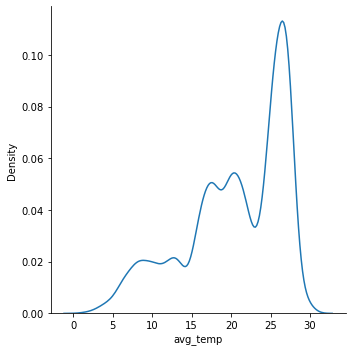

In [78]:
sns.displot(train_df["avg_temp"], kind="kde")

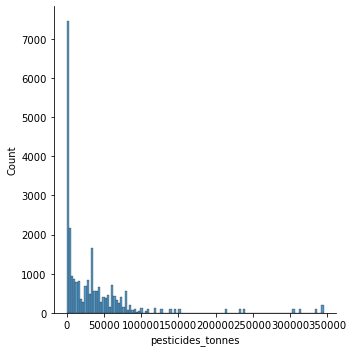

In [79]:
sns.displot(train_df["pesticides_tonnes"])

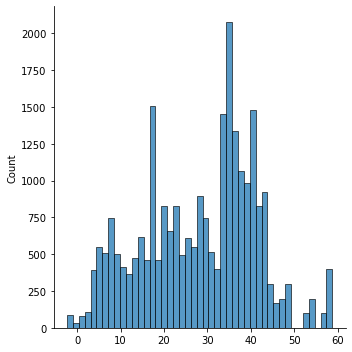

In [80]:
boxcox_transformed_pesticides_tonnes = boxcox(train_df["pesticides_tonnes"], lmbda=None)[0]
sns.displot(boxcox_transformed_pesticides_tonnes)

In [77]:
skewness_of_boxcox = skew(boxcox_transformed_pesticides_tonnes)
skewness_of_sqrt = skew(sqrt_transformed_pesticides_tonnes)
skewness_of_original = skew(train_df["pesticides_tonnes"])

print(skewness_of_boxcox)
print(skewness_of_original)

-0.15127510229657376
3.447500829301896


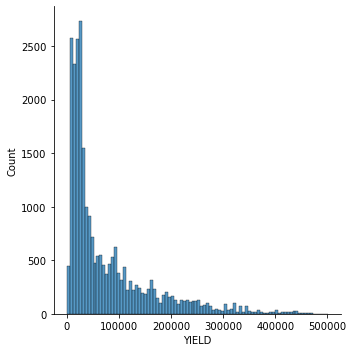

In [88]:
sns.displot(train_label)

<h1>Building a model with new data</h1>

In [200]:
train_features = pd.get_dummies(train_features, columns=["country", "crop_item"],  prefix=["Country", "Crop_Item"])
train_features

,year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,...,Crop_Item_Cassava,Crop_Item_Maize,Crop_Item_Plantains and others,Crop_Item_Potatoes,"Crop_Item_Rice, paddy",Crop_Item_Sorghum,Crop_Item_Soybeans,Crop_Item_Sweet potatoes,Crop_Item_Wheat,Crop_Item_Yams
0,1995,2274.0,2658.00,22.19,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1995,832.0,84153.00,12.47,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2005,1032.0,770.88,22.27,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2010,1522.0,9830.72,6.13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2008,383.0,27.63,24.79,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,2005,495.0,26857.00,21.14,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
25719,1993,2387.0,289.90,26.95,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
25720,2002,2702.0,1597.00,27.40,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
25721,1997,250.0,8112.00,4.52,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [149]:
normalizer = layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

In [131]:
model = keras.Sequential([
    normalizer,
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1)
])

model.compile(
    optimizer=keras.optimizers.Adam(0.05),
    loss="mean_squared_error",
    metrics=[keras.metrics.RootMeanSquaredError()]
)

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 114)              229       
 ion)                                                            
                                                                 
 dense_24 (Dense)            (None, 512)               58880     
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_25 (Dense)            (None, 512)               262656    
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_26 (Dense)            (None, 512)               262656    
                                                      

In [124]:
callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)

In [132]:
history = model.fit(train_features,
                   train_label,
                   epochs=100,
                   verbose=1,
                    callbacks=[callback],
                   validation_split=0.2)

Epoch 1/100
644/644 [==============================] - 7s 9ms/step - loss: 2449397248.0000 - root_mean_squared_error: 49491.3867 - val_loss: 1305180928.0000 - val_root_mean_squared_error: 36127.2891
Epoch 2/100
644/644 [==============================] - 6s 9ms/step - loss: 2565015296.0000 - root_mean_squared_error: 50645.9805 - val_loss: 3233551616.0000 - val_root_mean_squared_error: 56864.3281
Epoch 3/100
644/644 [==============================] - 6s 9ms/step - loss: 2208683264.0000 - root_mean_squared_error: 46996.6289 - val_loss: 2873703936.0000 - val_root_mean_squared_error: 53606.9414
Epoch 4/100
464/644 [====================>.........] - ETA: 1s - loss: 2348218880.0000 - root_mean_squared_error: 48458.4258

KeyboardInterrupt: 

 <h1>Model Fitted to Data including All Countries</h1>


In [158]:
countries = pd.read_csv("countries.csv")
countries = countries["country"]

0       Vatican City
1               Niue
2              Nauru
3             Tuvalu
4       Cook Islands
           ...      
191         Pakistan
192        Indonesia
193    United States
194            India
195            China
Name: country, Length: 196, dtype: object

In [175]:
train_features.head()

,year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,...,Crop_Item_Cassava,Crop_Item_Maize,Crop_Item_Plantains and others,Crop_Item_Potatoes,"Crop_Item_Rice, paddy",Crop_Item_Sorghum,Crop_Item_Soybeans,Crop_Item_Sweet potatoes,Crop_Item_Wheat,Crop_Item_Yams
0,1991,151.0,62.00,29.40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1996,748.0,39.16,28.74,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1999,626.0,187.00,6.55,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2009,758.0,61690.08,20.32,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,2007,1513.0,93.88,20.02,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [179]:
train_features.columns

Index(['year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes',
       'avg_temp', 'Country_Albania', 'Country_Algeria', 'Country_Angola',
       'Country_Argentina', 'Country_Armenia', 'Country_Australia',
       ...
       'Crop_Item_Cassava', 'Crop_Item_Maize',
       'Crop_Item_Plantains and others', 'Crop_Item_Potatoes',
       'Crop_Item_Rice, paddy', 'Crop_Item_Sorghum', 'Crop_Item_Soybeans',
       'Crop_Item_Sweet potatoes', 'Crop_Item_Wheat', 'Crop_Item_Yams'],
      dtype='object', length=114)

In [181]:
new_countries = {}
num_cases = train_features.shape[0]
for country in countries:
    new_country = "Country_" + country
    if new_country not in train_features:
        new_countries[new_country] = np.zeros(num_cases, dtype=np.uint8)

new_countries_df = pd.DataFrame(new_countries)
new_countries_df.head()

,Country_Vatican City,Country_Niue,Country_Nauru,Country_Tuvalu,Country_Cook Islands,Country_Palau,Country_San Marino,Country_Liechtenstein,Country_Monaco,Country_Saint Kitts and Nevis,...,Country_Tanzania,Country_Iran,Country_DR Congo,Country_Vietnam,Country_Philippines,Country_Ethiopia,Country_Russia,Country_Nigeria,Country_United States,Country_China
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [182]:
train_features = pd.concat([train_features, new_countries_df], axis=1)
train_features.shape

(25723, 211)

In [183]:
normalizer = layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

In [185]:
model = keras.Sequential([
    normalizer,
    layers.Dense(256, activation="relu"),
    layers.Dense(256, activation="relu"),
    layers.Dense(1)
])

model.compile(optimizer=keras.optimizers.Adam(0.1),
              loss="mean_squared_error",
              metrics=[keras.metrics.RootMeanSquaredError()]
             )

model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_5 (Normalizat  (None, 211)              423       
 ion)                                                            
                                                                 
 dense_42 (Dense)            (None, 256)               54272     
                                                                 
 dense_43 (Dense)            (None, 256)               65792     
                                                                 
 dense_44 (Dense)            (None, 1)                 257       
                                                                 
Total params: 120,744
Trainable params: 120,321
Non-trainable params: 423
_________________________________________________________________


In [186]:
history = model.fit(train_features,
                   train_label,
                   epochs=100,
                   verbose=1, 
                   validation_split=0.2)

Epoch 1/100
644/644 [==============================] - 7s 10ms/step - loss: 1178056064.0000 - root_mean_squared_error: 34322.8242 - val_loss: 820837184.0000 - val_root_mean_squared_error: 28650.2578
Epoch 2/100
644/644 [==============================] - 6s 9ms/step - loss: 486126784.0000 - root_mean_squared_error: 22048.2832 - val_loss: 576484416.0000 - val_root_mean_squared_error: 24010.0898
Epoch 3/100
644/644 [==============================] - 6s 9ms/step - loss: 408303360.0000 - root_mean_squared_error: 20206.5176 - val_loss: 437251712.0000 - val_root_mean_squared_error: 20910.5645
Epoch 4/100
644/644 [==============================] - 7s 10ms/step - loss: 325513216.0000 - root_mean_squared_error: 18041.9844 - val_loss: 312126176.0000 - val_root_mean_squared_error: 17667.0938
Epoch 5/100
644/644 [==============================] - 6s 10ms/step - loss: 292460064.0000 - root_mean_squared_error: 17101.4648 - val_loss: 363850016.0000 - val_root_mean_squared_error: 19074.8535
Epoch 6/100

KeyboardInterrupt: 

In [188]:
country_columns = [column for column in train_features.columns if "Country" in column]
train_features_without_country = train_features.drop(columns=country_columns, axis=1)
train_features_without_country.shape

(25723, 14)

In [190]:
normalizer_without_country = layers.Normalization(axis=-1)
normalizer_without_country.adapt(np.array(train_features_without_country))

In [191]:
model = keras.Sequential([
    normalizer_without_country,
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(1)
])
model.compile(optimizer=keras.optimizers.Adam(0.1),
             loss="mean_squared_error",
             metrics=keras.metrics.RootMeanSquaredError())

model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_6 (Normalizat  (None, 14)               29        
 ion)                                                            
                                                                 
 dense_45 (Dense)            (None, 128)               1920      
                                                                 
 dense_46 (Dense)            (None, 128)               16512     
                                                                 
 dense_47 (Dense)            (None, 1)                 129       
                                                                 
Total params: 18,590
Trainable params: 18,561
Non-trainable params: 29
_________________________________________________________________


In [192]:
 history = model.fit(train_features_without_country,
                    train_label,
                    epochs=100,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/100
644/644 [==============================] - 5s 8ms/step - loss: 2637451008.0000 - root_mean_squared_error: 51356.1172 - val_loss: 2248390144.0000 - val_root_mean_squared_error: 47417.1953
Epoch 2/100
644/644 [==============================] - 5s 8ms/step - loss: 2279713792.0000 - root_mean_squared_error: 47746.3477 - val_loss: 2136584704.0000 - val_root_mean_squared_error: 46223.2070
Epoch 3/100
644/644 [==============================] - 5s 8ms/step - loss: 1893962496.0000 - root_mean_squared_error: 43519.6797 - val_loss: 1525091072.0000 - val_root_mean_squared_error: 39052.4141
Epoch 4/100
644/644 [==============================] - 5s 8ms/step - loss: 1476468224.0000 - root_mean_squared_error: 38424.8398 - val_loss: 1681796608.0000 - val_root_mean_squared_error: 41009.7148
Epoch 5/100
475/644 [=====================>........] - ETA: 1s - loss: 1307712128.0000 - root_mean_squared_error: 36162.3008

KeyboardInterrupt: 

In [217]:
import pathlib
import shutil
import tempfile

In [218]:
logdir = pathlib.Path(tempfile.mkdtemp())/"tensorboard_logs"
shutil.rmtree(logdir, ignore_errors=True)

In [206]:
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

In [273]:
number_of_instances = len(train_features.index)
n_train = len(train_features.index)
n_epochs = 100
batch_size = len(train_features.index)
buffer_size = 1000


In [348]:
train_df = pd.read_csv("challengeB_data/2022challengeB_train.csv", index_col=[0]).sample(frac=1).reset_index(drop=True)
train_df_onehot = pd.get_dummies(train_df, columns=["country", "crop_item"], prefix=["Country_", "Crop_Item"])
features = [feature for feature in train_df_onehot if feature != "YIELD"]

In [349]:
ds = tf.data.Dataset.from_tensor_slices(
    (
        train_df_onehot[features].values,
        train_df_onehot["YIELD"].values
    )
)

In [350]:
train_ds = ds.take(n_train).cache()

In [351]:
features_np = np.empty_like(train_df_onehot[features].to_numpy(), dtype=np.float64)

In [352]:
for index, data in enumerate(train_ds.take(-1)):
    features_np[index] = data[0]

In [355]:
normalizer = layers.Normalization(axis=-1)
normalizer.adapt(features_np)

In [278]:
def get_callbacks(name):
    return [
        tfdocs.modeling.EpochDots(),
        tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error', patience=200),
        tf.keras.callbacks.TensorBoard(logdir/name),
    ]

In [356]:
train_ds = train_ds.shuffle(buffer_size).repeat()

In [360]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.1,
  decay_steps=int(n_epochs/10),
  decay_rate=1,
  staircase=False)

def get_optimizer():
    return keras.optimizers.Adam(0.1)

def compile_and_fit(model, name, optimizer=None, max_epochs=1000):
    if optimizer is None:
        optimizer = get_optimizer()

    model.compile(optimizer=optimizer,
                loss="mean_squared_error",
                metrics=keras.metrics.RootMeanSquaredError())

    model.summary()

    history = model.fit(
        train_ds,
        epochs=max_epochs,
        validation_data=validate_ds,
        steps_per_epoch=1,
        callbacks=get_callbacks(name),
        verbose=1)
    return history

In [358]:
model = keras.Sequential([
    normalizer,
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(1)
])

In [361]:
history = compile_and_fit(model, "some_model", max_epochs=100)

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_12 (Normaliza  (None, 114)              229       
 tion)                                                           
                                                                 
 dense_54 (Dense)            (None, 128)               14720     
                                                                 
 dense_55 (Dense)            (None, 128)               16512     
                                                                 
 dense_56 (Dense)            (None, 1)                 129       
                                                                 
Total params: 31,590
Trainable params: 31,361
Non-trainable params: 229
_________________________________________________________________
Epoch 1/100


ValueError: in user code:

    File "/Users/alexandrospouroullis/miniforge3/envs/LoopQPrize/lib/python3.8/site-packages/keras/engine/training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "/Users/alexandrospouroullis/miniforge3/envs/LoopQPrize/lib/python3.8/site-packages/keras/engine/training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/alexandrospouroullis/miniforge3/envs/LoopQPrize/lib/python3.8/site-packages/keras/engine/training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "/Users/alexandrospouroullis/miniforge3/envs/LoopQPrize/lib/python3.8/site-packages/keras/engine/training.py", line 860, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/alexandrospouroullis/miniforge3/envs/LoopQPrize/lib/python3.8/site-packages/keras/engine/training.py", line 918, in compute_loss
        return self.compiled_loss(
    File "/Users/alexandrospouroullis/miniforge3/envs/LoopQPrize/lib/python3.8/site-packages/keras/engine/compile_utils.py", line 212, in __call__
        batch_dim = tf.shape(y_t)[0]

    ValueError: slice index 0 of dimension 0 out of bounds. for '{{node strided_slice}} = StridedSlice[Index=DT_INT32, T=DT_INT32, begin_mask=0, ellipsis_mask=0, end_mask=0, new_axis_mask=0, shrink_axis_mask=1](Shape, strided_slice/stack, strided_slice/stack_1, strided_slice/stack_2)' with input shapes: [0], [1], [1], [1] and with computed input tensors: input[1] = <0>, input[2] = <1>, input[3] = <1>.
